In [2]:
import glob,sys,os,re
from mylab.ana.miniscope.context_exposure.Canamini import *
from mylab.ana.miniscope.context_exposure.ana_funtions import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from core.Cdatabase import *


In [3]:
db = database()

In [3]:
db.celltypes[0]

'\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_201033_part1_day20200721_aim_ce.pkl'

### different cellids of different cell types

In [4]:
ct = celltype(db.celltypes[0])

In [5]:
contextcell_id, rdcell_id,pccell_id,total_cell_num = ct.specific_ids(contexts=[0,1])


contextcell_ids= list(set(contextcell_id["ctx0cells"]+contextcell_id["ctx1cells"]))
rdcell_ids = list(set(rdcell_id["context0_leftcells"]+ rdcell_id["context0_rightcells"]+ rdcell_id["context1_leftcells"]+ rdcell_id["context1_rightcells"]))
pccell_ids = list(set(pccell_id["context0_pccells"] + pccell_id["context1_pccells"]))
#         print(rdcell_ids)

ctx_cellids = list(set(spread(contextcell_id.values())))
rd_cellids = list(set(spread(rdcell_id.values())))
ctx_rd_cellids = [i for i in ctx_cellids if i in rd_cellids]

pc_cellids = list(set(spread(pccell_id.values())))        
ctx_pc_cellids = [i for i in ctx_cellids if i in pc_cellids]
rd_pc_cellids = [i for i in rd_cellids if i in pc_cellids]

ctx_rd_pc_cellids = [i for i in ctx_rd_cellids if i in pc_cellids]

ctx_only_cellids = [i for i in ctx_cellids if i not in rd_cellids and i not in pc_cellids]
rd_only_cellids = [i for i in rd_cellids if i not in ctx_cellids and i not in pc_cellids]
pc_only_cellids = [i for i in pc_cellids if i not in rd_cellids and i not in ctx_cellids]

rdcells: try body_speed> 3cm/s


### cell number distribution along csi

In [6]:
csi = ct.csi(contexts=[0,1])

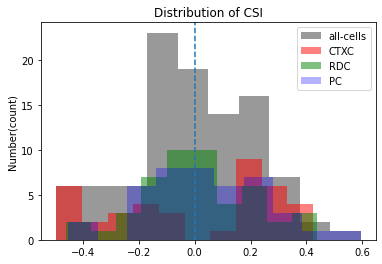

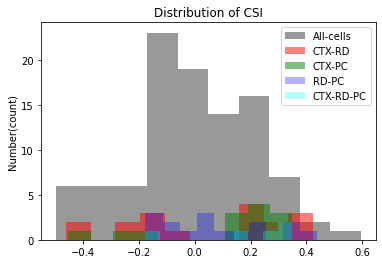

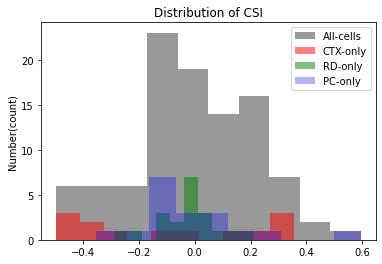

In [7]:
allc = plt.hist(csi,alpha=0.8,histtype="bar",color="gray")
ctx = plt.hist(csi[contextcell_ids],histtype="bar",alpha=0.5,color="red")
rd = plt.hist(csi[rd_cellids],histtype="bar",alpha=0.5,color="green")
pc = plt.hist(csi[pc_cellids],histtype="bar",alpha=0.3,color="blue")
plt.legend(labels=["all-cells","CTXC","RDC","PC"])
plt.axvline(x=0,linestyle="--")
plt.title("Distribution of CSI")
plt.ylabel("Number(count)")
plt.show()

# sns.distplot(csi,color="gray")
plt.hist(csi,alpha=0.8,histtype="bar",color="gray")
plt.hist(csi[ctx_rd_cellids],histtype="bar",alpha=0.5,color="red")
plt.hist(csi[ctx_pc_cellids],histtype="bar",alpha=0.5,color="green")
plt.hist(csi[rd_pc_cellids],histtype="bar",alpha=0.3,color="blue")
plt.hist(csi[ctx_rd_pc_cellids],histtype="bar",alpha=0.3,color="cyan")
plt.legend(labels=["All-cells","CTX-RD","CTX-PC","RD-PC","CTX-RD-PC"])
plt.title("Distribution of CSI")
plt.ylabel("Number(count)")
plt.show()

plt.hist(csi,alpha=0.8,histtype="bar",color="gray")
plt.hist(csi[ctx_only_cellids],histtype="bar",alpha=0.5,color="red")
plt.hist(csi[rd_only_cellids],histtype="bar",alpha=0.5,color="green")
plt.hist(csi[pc_only_cellids],histtype="bar",alpha=0.3,color="blue")
plt.legend(labels=["All-cells","CTX-only","RD-only","PC-only"])
plt.title("Distribution of CSI")
plt.ylabel("Number(count)")
plt.show()

### index along the max-firing place bin

In [4]:
celltypes = db.index_celltypes(mouse_id="206551")
celltypes = [i for i in celltypes if "test" in i]
celltypes

['\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206551_part5_day20200810_aim_test.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206551_part5_day20200814_aim_test.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206551_part5_day20200821_aim_test.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206551_part5_day20200824_aim_test.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206551_part5_day20200825_aim_test.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206551_part5_day20200831_aim_test.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206551_part6_day20200901_aim_test.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206551_part6_day20200902_aim_test.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206551_part6_day20200904_aim_tes

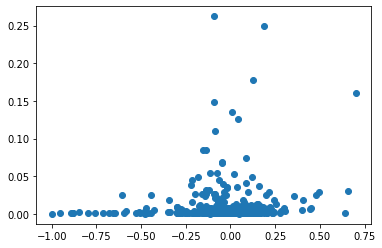

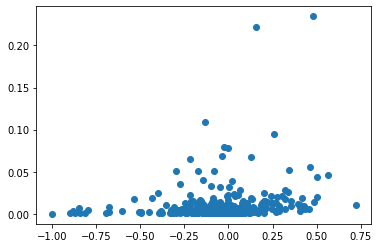

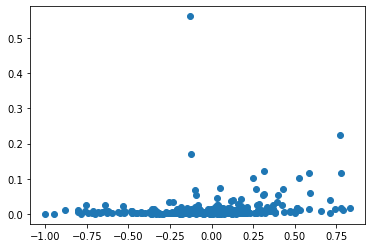

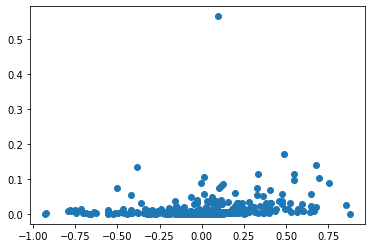

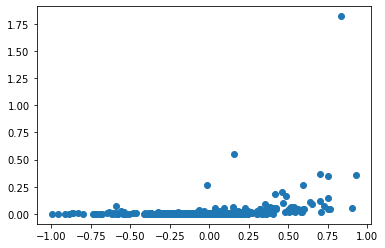

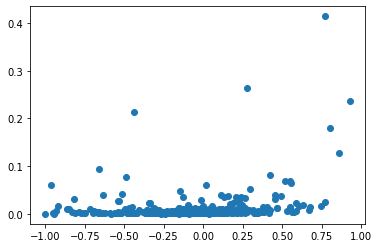

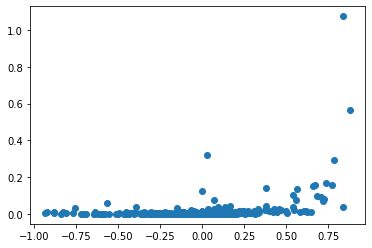

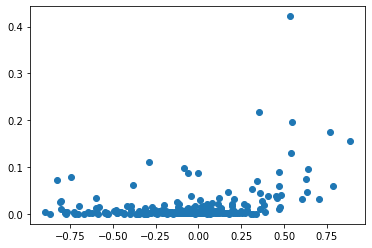

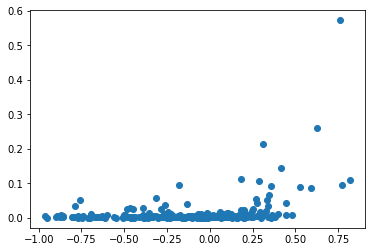

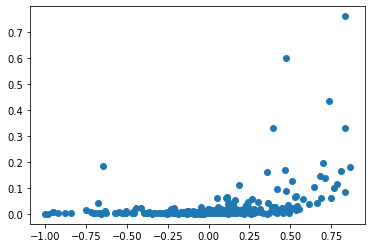

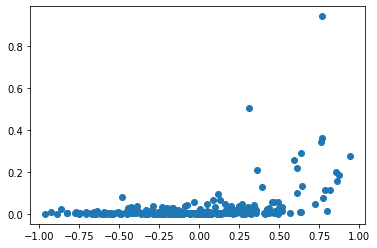

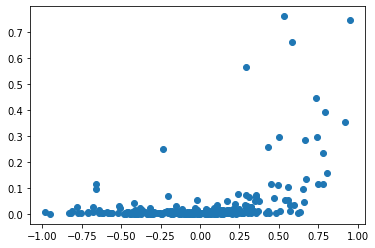

In [7]:
for celltype_file in celltypes:
    ct = celltype(celltype_file)
    plt.scatter(ct.csi(),ct.si()[ct.csi().index])
    plt.show()

In [81]:
ct.si()[ct.csi().index]

206550_0      0.013286
206550_1      0.014508
206550_2      0.004363
206550_3      0.021915
206550_4      0.011893
                ...   
206550_565    0.214183
206550_566    0.070637
206550_567    0.147464
206550_568    0.086333
206550_580    0.052395
Length: 298, dtype: float32

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


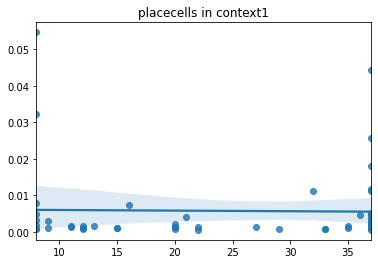

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


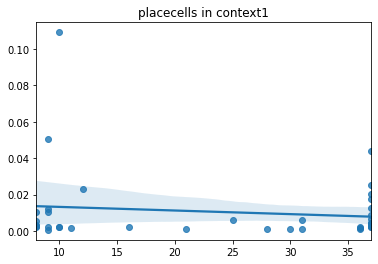

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


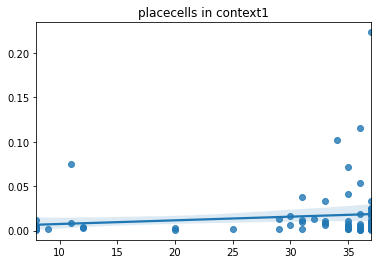

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


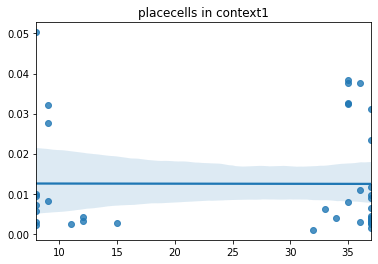

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


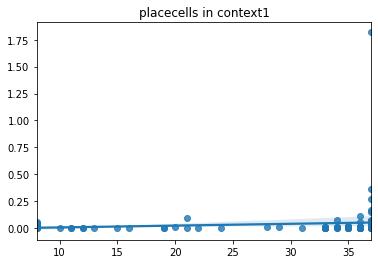

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


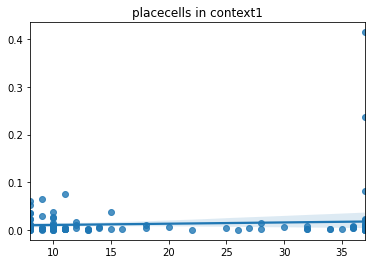

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


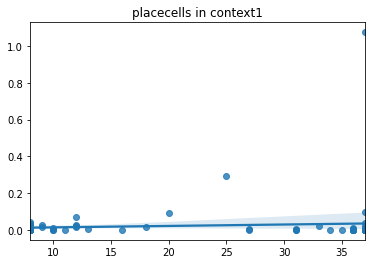

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


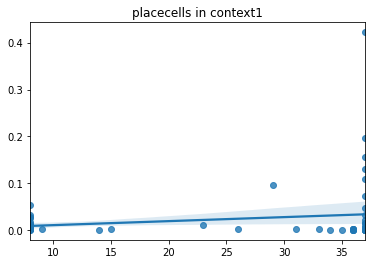

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


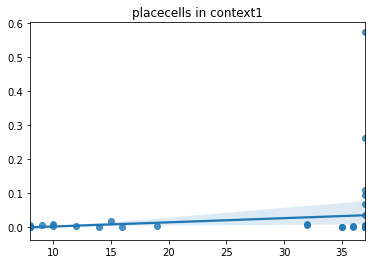

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


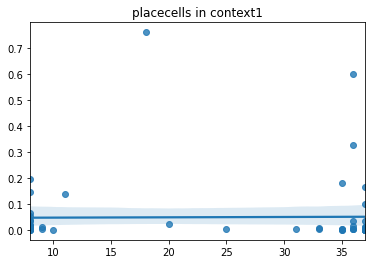

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


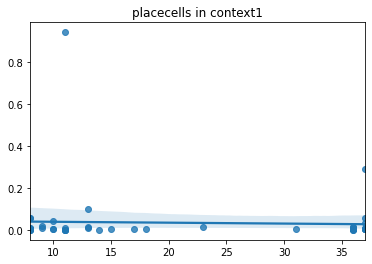

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


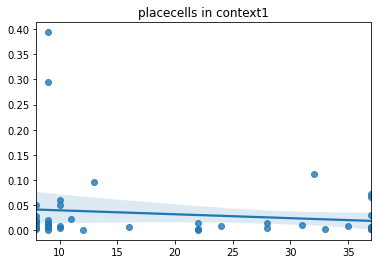

In [8]:
for celltype_file in celltypes:
    ct = celltype(celltype_file)
    _,_,pccell_ids,_ = ct.specific_ids(contexts=[0,1])
    context = 1
    cells = pccell_ids["context%s_pccells"%context]
    maxfr_placebins = ct.MaxFr_placebin(context=context)

    si = ct.si()

    # plt.scatter(maxfr_placebins,si)
    sns.regplot(maxfr_placebins[cells],si[cells])
    plt.title("placecells in context%s"%context)
    plt.show()

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


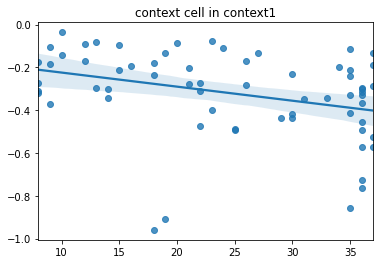

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


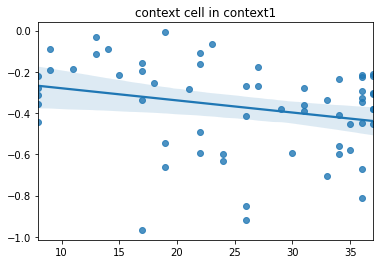

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


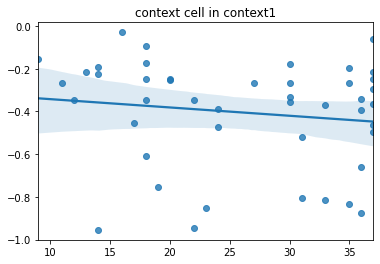

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


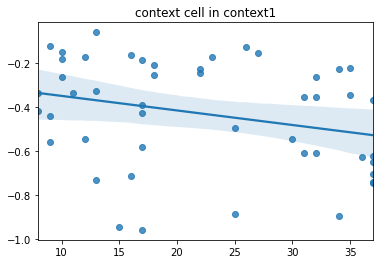

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


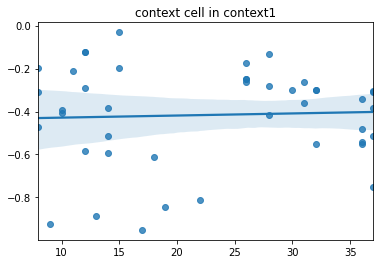

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


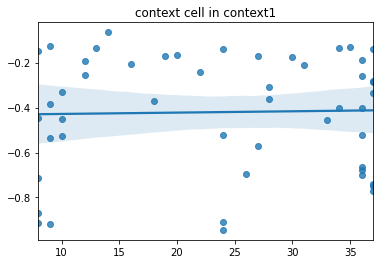

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


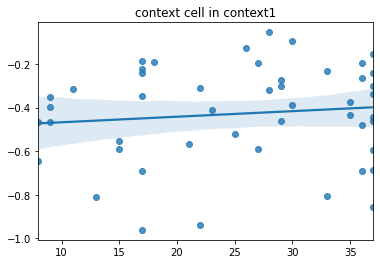

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


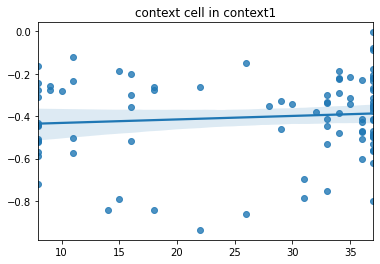

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


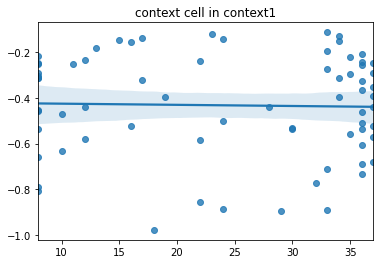

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


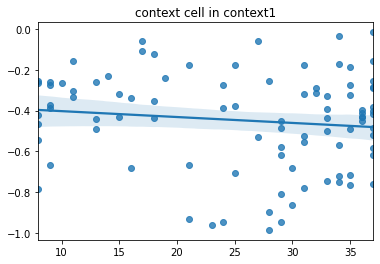

In [77]:
for celltype_file in celltypes:
    ct = celltype(celltype_file)
    contextcell_ids,_,_,_ = ct.specific_ids(contexts=[0,1])
    context = 1
    cells = contextcell_ids["ctx%scells"%context]
    maxfr_placebins = ct.MaxFr_placebin(context=context)
    csi = ct.csi()

    # plt.scatter(maxfr_placebins,si)
    sns.regplot(maxfr_placebins[cells],csi[cells])
    plt.title("context cell in context%s"%context)
    plt.show()

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


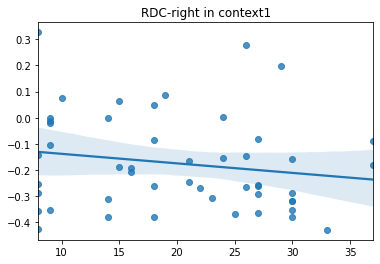

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


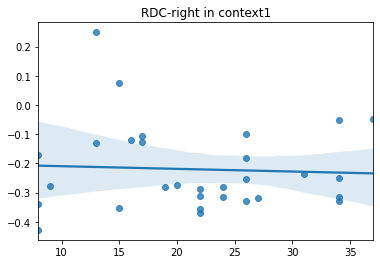

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


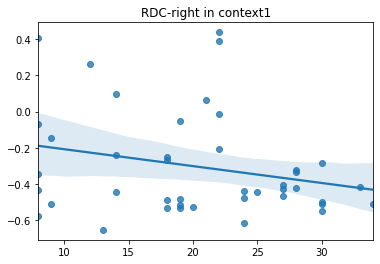

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


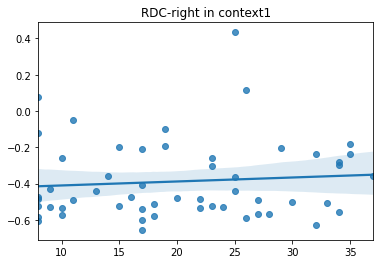

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


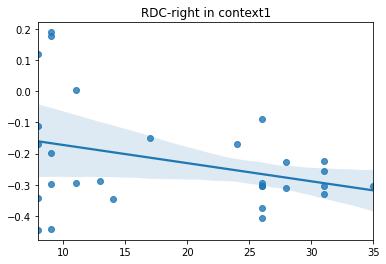

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


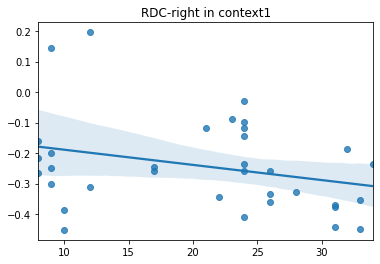

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


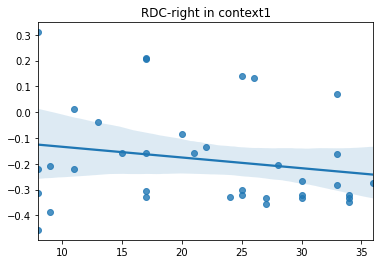

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


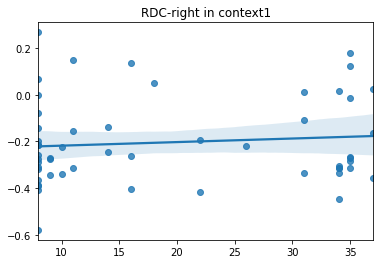

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


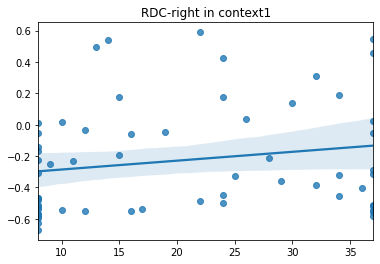

rdcells: try body_speed> 3cm/s
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


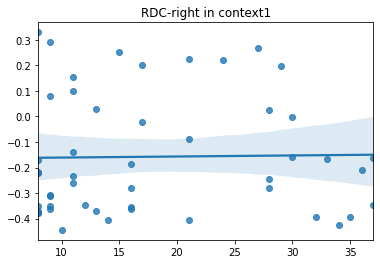

In [78]:
for celltype_file in celltypes:
    ct = celltype(celltype_file)
    _,rdcell_ids,_,_ = ct.specific_ids(contexts=[0,1])
    context = 1
    direction = "right"
    cells = rdcell_ids["context%s_%scells"%(context,direction)]
    maxfr_placebins = ct.MaxFr_placebin(context=context)
    rdsi = ct.rdsi()

    # plt.scatter(maxfr_placebins,si)
    sns.regplot(maxfr_placebins[cells],rdsi[cells])
    plt.title("RDC-%s in context%s"%(direction,context))
    plt.show()